<a href="https://colab.research.google.com/github/keithferns98/TimeSeries/blob/main/TimeSeriesForecastingLstm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 1s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


Take hours only from the data

In [4]:
df=df[5::6]
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [9]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70091 entries, 2009-01-01 01:00:00 to 2016-12-31 23:10:00
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Time        70091 non-null  object 
 1   p (mbar)         70091 non-null  float64
 2   T (degC)         70091 non-null  float64
 3   Tpot (K)         70091 non-null  float64
 4   Tdew (degC)      70091 non-null  float64
 5   rh (%)           70091 non-null  float64
 6   VPmax (mbar)     70091 non-null  float64
 7   VPact (mbar)     70091 non-null  float64
 8   VPdef (mbar)     70091 non-null  float64
 9   sh (g/kg)        70091 non-null  float64
 10  H2OC (mmol/mol)  70091 non-null  float64
 11  rho (g/m**3)     70091 non-null  float64
 12  wv (m/s)         70091 non-null  float64
 13  max. wv (m/s)    70091 non-null  float64
 14  wd (deg)         70091 non-null  float64
dtypes: float64(14), object(1)
memory usage: 8.6+ MB


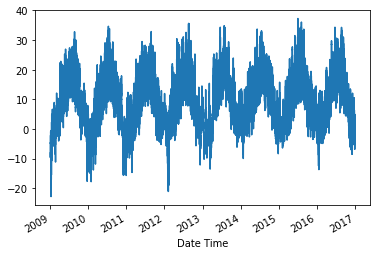

In [18]:
temp=df['T (degC)']
temp.plot()

In [22]:
def df_x_y(df,window_size=5):
  df_as_numpy=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_numpy)-window_size):
    row=[[a] for a in df_as_numpy[i:i+window_size]]
    X.append(row)
    label=df_as_numpy[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [23]:
WINDOW_SIZE = 5
X1, y1 = df_x_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70086, 5, 1), (70086,))

In [25]:
X1

array([[[-8.05],
        [-8.88],
        [-8.81],
        [-9.05],
        [-9.63]],

       [[-8.88],
        [-8.81],
        [-9.05],
        [-9.63],
        [-9.67]],

       [[-8.81],
        [-9.05],
        [-9.63],
        [-9.67],
        [-9.17]],

       ...,

       [[ 2.44],
        [ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ]],

       [[ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75]],

       [[-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75],
        [-2.89]]])

In [26]:
y1

array([-9.67, -9.17, -8.1 , ..., -2.75, -2.89, -3.93])

In [27]:
X_train1,y_train1=X1[:60000],y1[:60000]
X_val1,y_val1=X1[60000:65000],y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1=Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [31]:
cp=ModelCheckpoint('model1/',save_best_only=True)
model1.compile(loss=MeanSquaredError(),metrics=[RootMeanSquaredError()],optimizer=Adam(learning_rate=0.001))

In [32]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp])

Epoch 1/10
1872/1875 [============================>.] - ETA: 0s - loss: 4.9912 - root_mean_squared_error: 2.2341

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 14s 6ms/step - loss: 4.9845 - root_mean_squared_error: 2.2326 - val_loss: 0.5043 - val_root_mean_squared_error: 0.7102
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6818 - root_mean_squared_error: 0.8257 - val_loss: 0.5137 - val_root_mean_squared_error: 0.7167
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6731 - root_mean_squared_error: 0.8205 - val_loss: 0.5462 - val_root_mean_squared_error: 0.7391
Epoch 4/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6592 - root_mean_squared_error: 0.8119

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6596 - root_mean_squared_error: 0.8122 - val_loss: 0.4872 - val_root_mean_squared_error: 0.6980
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6553 - root_mean_squared_error: 0.8095 - val_loss: 0.5505 - val_root_mean_squared_error: 0.7420
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6579 - root_mean_squared_error: 0.8111 - val_loss: 0.5290 - val_root_mean_squared_error: 0.7273
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6529 - root_mean_squared_error: 0.8080 - val_loss: 0.4914 - val_root_mean_squared_error: 0.7010
Epoch 8/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.6530 - root_mean_squared_error: 0.8081

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 6ms/step - loss: 0.6526 - root_mean_squared_error: 0.8078 - val_loss: 0.4822 - val_root_mean_squared_error: 0.6944
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6471 - root_mean_squared_error: 0.8045 - val_loss: 0.4864 - val_root_mean_squared_error: 0.6974
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6459 - root_mean_squared_error: 0.8036 - val_loss: 0.4901 - val_root_mean_squared_error: 0.7000


In [33]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [34]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,-9.914384,-9.67
1,-9.676017,-9.17
2,-8.703708,-8.10
3,-7.271196,-7.66
4,-7.244228,-7.04
...,...,...
59995,6.223047,6.07
59996,7.151239,9.88
59997,12.119934,13.53
59998,15.466257,15.43


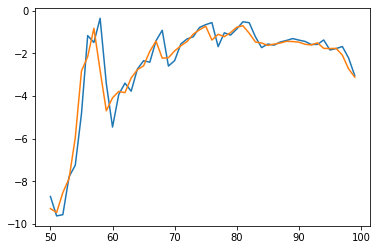

In [35]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

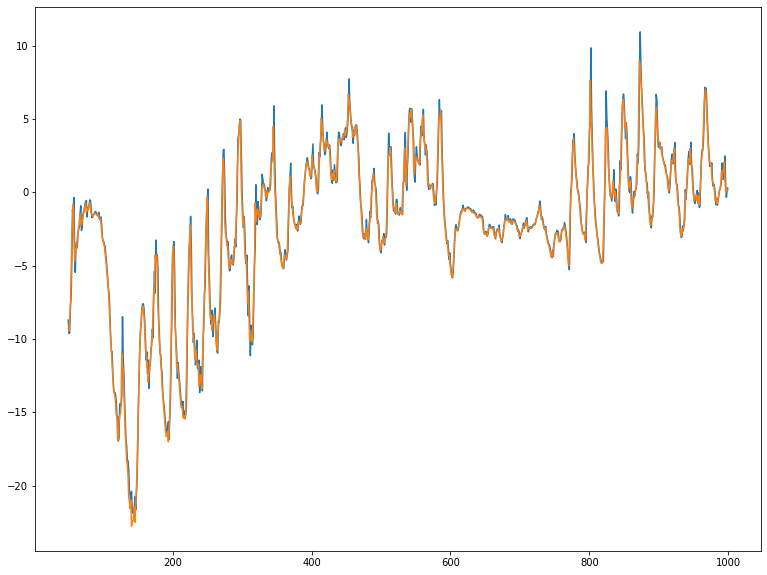

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.plot(train_results['Train Predictions'][50:1000])
plt.plot(train_results['Actuals'][50:1000])

In [39]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,14.425283,13.99
1,13.279376,13.46
2,12.959183,12.93
3,12.537796,12.43
4,12.099432,12.17
...,...,...
5081,-0.918315,-0.98
5082,-1.427434,-1.40
5083,-1.638036,-2.75
5084,-3.032040,-2.89


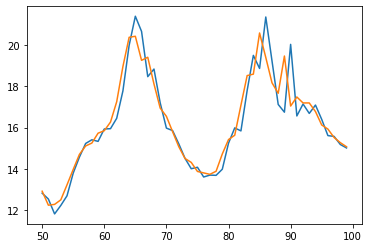

In [41]:
plt.plot(test_results['Test Predictions'][50:100])
plt.plot(test_results['Actuals'][50:100])

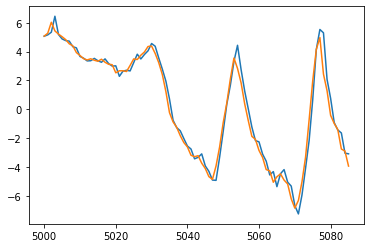

In [43]:
plt.plot(test_results['Test Predictions'][5000:])
plt.plot(test_results['Actuals'][5000:])